# MultiplEYE preprocessing

In [1]:
from pathlib import Path


In [9]:
# Create a dictionary with all the relevant information from the file path
from pathlib import Path

import re

path_asc_file = "data\\017_NL_NL_1_ET1_testrun_1733144369\\017nlnl1.asc"
local_file_part = "C:\\Users\saphi\PycharmProjects\multipleye-preprocessing"
stimulus_file_path = "C:\\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024"


def extract_informatio_file_path(path_asc_file, local_file_path, stimulus_file_path):
   
    regex = r"(?P<participant_number>\d{3})_(?P<lang>\w{2})_(?P<country>\w{2})_(?P<labnum>\d)_(?P<ET>ET\d)_(?P<extra>\w+)\\(?P<participant_abbr>\w+).asc"
    stim_regex = r"stimuli_MultiplEYE_(?P<data_coll_abr>\w{2}_\w{2}_[a-zA-Z]+_\d_\d{4})"
    matches = re.search(regex, path_asc_file)
    vars_dict = matches.groupdict()
    stim_matches = re.search(stim_regex, stimulus_file_path)
    stim_dict = stim_matches.groupdict()
    vars_dict.update(stim_dict)
    
    if matches:
        print ("Match was found at {start}-{end}: {match}".format(start = matches.start(), end = matches.end(), match = matches.group()))
        
        for groupNum in range(0, len(matches.groups())):
            groupNum = groupNum + 1
            
            print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = matches.start(groupNum), end = matches.end(groupNum), group = matches.group(groupNum)))
    vars_dict["local_file_path"] = Path(local_file_path)
    vars_dict["asc_file"] = Path(local_file_path) / Path(path_asc_file)
    vars_dict["stimulus_file_path"] = Path(stimulus_file_path)
    vars_dict["city"] = vars_dict["data_coll_abr"].split("_")[2]
    vars_dict["year"] = vars_dict["data_coll_abr"].split("_")[4]
    output_dir = f"{vars_dict['local_file_path']}\quality-report\output\{vars_dict['data_coll_abr']}"
    output_dir = Path(output_dir)
    print(output_dir)
    output_dir.mkdir(exist_ok=True)
    vars_dict["output_dir"] = output_dir
    vars_dict["json"] = Path(f"{stimulus_file_path}\config\MultiplEYE_{vars_dict['data_coll_abr']}_lab_configuration.json")
    print(vars_dict['asc_file'].exists())
    vars_dict["config"] = Path(f"{stimulus_file_path}\config\config_{vars_dict['lang'].lower()}_{vars_dict['country'].lower()}_{vars_dict['city']}_{vars_dict['labnum']}_{vars_dict['year']}.py")
    return vars_dict
    
vars_dict = extract_informatio_file_path(path_asc_file, local_file_part, stimulus_file_path)

print(vars_dict)

Match was found at 5-52: 017_NL_NL_1_ET1_testrun_1733144369\017nlnl1.asc
Group 1 found at 5-8: 017
Group 2 found at 9-11: NL
Group 3 found at 12-14: NL
Group 4 found at 15-16: 1
Group 5 found at 17-20: ET1
Group 6 found at 21-39: testrun_1733144369
Group 7 found at 40-48: 017nlnl1
C:\Users\saphi\PycharmProjects\multipleye-preprocessing\quality-report\output\NL_NL_Nijmegen_1_2024
True
{'participant_number': '017', 'lang': 'NL', 'country': 'NL', 'labnum': '1', 'ET': 'ET1', 'extra': 'testrun_1733144369', 'participant_abbr': '017nlnl1', 'data_coll_abr': 'NL_NL_Nijmegen_1_2024', 'local_file_path': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing'), 'asc_file': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/017_NL_NL_1_ET1_testrun_1733144369/017nlnl1.asc'), 'stimulus_file_path': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024'), 'city': 'Nijmegen', 'year': '2024', 'output_dir': W

In [10]:
vars_dict["output_dir"]


WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/quality-report/output/NL_NL_Nijmegen_1_2024')

In [23]:
from stimulus import Stimulus
stimulus_dir = vars_dict["stimulus_file_path"]
lang = vars_dict["lang"].lower()
country = vars_dict["country"].lower()
labnum = vars_dict["labnum"]
stimulus_name = "PopSci_MultiplEYE"

stimulus = Stimulus.load(stimulus_dir, lang, country, labnum, stimulus_name)
for page in stimulus.pages:
    print(page.number, page.image_path)


1 C:\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\stimuli_images_nl_nl_1\popsci_multipleye_id1_page_1_nl.png
2 C:\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\stimuli_images_nl_nl_1\popsci_multipleye_id1_page_2_nl.png
3 C:\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\stimuli_images_nl_nl_1\popsci_multipleye_id1_page_3_nl.png
4 C:\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\stimuli_images_nl_nl_1\popsci_multipleye_id1_page_4_nl.png
5 C:\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\stimuli_images_nl_nl_1\popsci_multipleye_id1_page_5_nl.png
6 C:\Users\saphi\PycharmProjects\multipleye-preprocessing\data\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\stimuli_images_nl_nl_1\popsci_multipleye_id1_page_6_nl.png
7 C:\Users\saphi\Pycha

In [35]:
print("i am page 0:", stimulus.pages[0])
stimulus

i am page 0: StimulusPage(number=1, text='Het MultiplEYE-project\r\n\r\nDe naam "MultiplEYE" is een woordspeling die "multilingualism" of "multiple languages" (Engels voor "meertaligheid") combineert met "eye" (Engels voor "oog") van "eye-tracking" (oogbewegingsmeting). MultiplEYE is een door de Europese Unie gefinancierde COST-actie. COST-acties zijn onderzoeksnetwerken die worden ondersteund door de European Cooperation in Science and Technology, kortweg COST. Als financieringsorganisatie ondersteunt COST ons groeiende netwerk van onderzoekers in heel Europa en daarbuiten, door financiële steun te verlenen voor het uitvoeren van verschillende netwerkactiviteiten.', image_path=WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024/stimuli_images_nl_nl_1/popsci_multipleye_id1_page_1_nl.png'))


Stimulus(id=1, name='PopSci_MultiplEYE', type='experiment', pages=[StimulusPage(number=1, text='Het MultiplEYE-project\r\n\r\nDe naam "MultiplEYE" is een woordspeling die "multilingualism" of "multiple languages" (Engels voor "meertaligheid") combineert met "eye" (Engels voor "oog") van "eye-tracking" (oogbewegingsmeting). MultiplEYE is een door de Europese Unie gefinancierde COST-actie. COST-acties zijn onderzoeksnetwerken die worden ondersteund door de European Cooperation in Science and Technology, kortweg COST. Als financieringsorganisatie ondersteunt COST ons groeiende netwerk van onderzoekers in heel Europa en daarbuiten, door financiële steun te verlenen voor het uitvoeren van verschillende netwerkactiviteiten.', image_path=WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024/stimuli_images_nl_nl_1/popsci_multipleye_id1_page_1_nl.png')), StimulusPage(number=2, text='Onder deze activiteiten zijn vergaderingen van werkg

In [12]:
import json
with open (vars_dict["json"]) as f:
    lab_config = json.load(f)
    
lab_config

{'Contact information': {'First_name': 'Stefan',
  'Last_name': 'Frank',
  'Affiliation': 'Radboud University',
  'Email': 'stefan.frank@ru.nl',
  'Phone': ''},
 'Data_collection_name': 'MultiplEYE_NL_NL_Nijmegen_1_2024',
 'Preregistration_core_or_additional_data_collection': 'pre-registration for core dataset',
 'Name_eye-tracker': 'EyeLink 1000 Plus',
 'Name_eye-tracker_manufacturer': 'SR Research',
 'Specification_camera_system': 'desktop mount',
 'Name_computer_operation_system': 'Windows 10',
 'Name_monitor': ['XL2430T', 'BenQ'],
 'Monitor_resolution_in_px': '(3840,2160)',
 'Screen_size_in_cm': '(59.8,33.6)',
 'Distance_in_cm': '60',
 'Script_direction': 'LTR',
 'Language_code': 'NL',
 'Country_code': 'NL',
 'Lab_number': '1',
 'City': 'Nijmegen',
 'Estimated_end_year_of_data_collection': '2024',
 'Use_of_multiple_devices': 'No',
 'Stimuli_preparation': ['Stimuli will be or has been prepared by our own lab'],
 'Psychometric_tests': {'Are_tests_conducted': 'No',
  'LWMC': '',
  'PL

## ASC to sample-level CSV

Convert the ASC files to CSV files (one for each page) where each row is a sample.

In [13]:
print(vars_dict)

{'participant_number': '017', 'lang': 'NL', 'country': 'NL', 'labnum': '1', 'ET': 'ET1', 'extra': 'testrun_1733144369', 'participant_abbr': '017nlnl1', 'data_coll_abr': 'NL_NL_Nijmegen_1_2024', 'local_file_path': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing'), 'asc_file': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/017_NL_NL_1_ET1_testrun_1733144369/017nlnl1.asc'), 'stimulus_file_path': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024'), 'city': 'Nijmegen', 'year': '2024', 'output_dir': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/quality-report/output/NL_NL_Nijmegen_1_2024'), 'json': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024/config/MultiplEYE_NL_NL_Nijmegen_1_2024_lab_configuration.json'), 'config': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data

In [15]:
from report import load_data

gaze = load_data(vars_dict['asc_file'], vars_dict["stimulus_file_path"], config=vars_dict["config"])

ModuleSpec(name='stimulus_config', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001C22D4A25D0>, origin='C:\\Users\\saphi\\PycharmProjects\\multipleye-preprocessing\\data\\stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024\\config\\config_nl_nl_Nijmegen_1_2024.py')


In [16]:
gaze.frame

time,pupil,screen,activity,practice,trial,stimulus,pixel
i64,f64,str,str,bool,str,str,list[f64]
1335359,1178.0,"""page_1""","""reading""",true,"""PRACTICE_trial_1""","""Lit_NorthWind_7""","[1194.9, 877.0]"
1335361,1178.0,"""page_1""","""reading""",true,"""PRACTICE_trial_1""","""Lit_NorthWind_7""","[1194.3, 877.7]"
1335363,1179.0,"""page_1""","""reading""",true,"""PRACTICE_trial_1""","""Lit_NorthWind_7""","[1193.9, 877.7]"
1335365,1179.0,"""page_1""","""reading""",true,"""PRACTICE_trial_1""","""Lit_NorthWind_7""","[1194.3, 876.9]"
1335367,1180.0,"""page_1""","""reading""",true,"""PRACTICE_trial_1""","""Lit_NorthWind_7""","[1194.7, 875.7]"
…,…,…,…,…,…,…,…
6853775,1153.0,"""question_12132""","""question""",false,"""trial_10""","""PopSci_Caveman_12""","[2254.5, 1589.8]"
6853777,1153.0,"""question_12132""","""question""",false,"""trial_10""","""PopSci_Caveman_12""","[2254.5, 1588.2]"
6853779,1153.0,"""question_12132""","""question""",false,"""trial_10""","""PopSci_Caveman_12""","[2254.7, 1586.8]"


In [17]:
gaze._metadata

{'weekday': 'Mon',
 'month': 'Dec',
 'day': 2,
 'time': '00:15:26',
 'year': 2024,
 'version_1': 'EYELINK II 1',
 'version_2': 'EYELINK II CL v4.594 Jul  6 2012',
 'resolution': (2376, 1801),
 'tracking_mode': 'CR',
 'sampling_rate': 500.0,
 'file_sample_filter': '2',
 'link_sample_filter': '1',
 'tracked_eye': 'L',
 'mount_configuration': {'mount_type': 'Desktop',
  'head_stabilization': 'stabilized',
  'eyes_recorded': 'monocular',
  'short_name': 'MTABLER'},
 'pupil_data_type': 'AREA',
 'version_number': '4.594',
 'model': 'EyeLink 1000',
 'datetime': datetime.datetime(2024, 12, 2, 0, 15, 26),
 'calibrations': [{'timestamp': '1307711.0',
   'num_points': '9',
   'type': 'P-CR',
   'tracked_eye': 'LEFT'},
  {'timestamp': '1654534.0',
   'num_points': '9',
   'type': 'P-CR',
   'tracked_eye': 'LEFT'},
  {'timestamp': '2404756.0',
   'num_points': '9',
   'type': 'P-CR',
   'tracked_eye': 'LEFT'},
  {'timestamp': '2459282.0',
   'num_points': '9',
   'type': 'P-CR',
   'tracked_eye': '

In [ ]:
gaze._metadata["recording_config"]

In [18]:
vars_dict

{'participant_number': '017',
 'lang': 'NL',
 'country': 'NL',
 'labnum': '1',
 'ET': 'ET1',
 'extra': 'testrun_1733144369',
 'participant_abbr': '017nlnl1',
 'data_coll_abr': 'NL_NL_Nijmegen_1_2024',
 'local_file_path': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing'),
 'asc_file': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/017_NL_NL_1_ET1_testrun_1733144369/017nlnl1.asc'),
 'stimulus_file_path': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024'),
 'city': 'Nijmegen',
 'year': '2024',
 'output_dir': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/quality-report/output/NL_NL_Nijmegen_1_2024'),
 'json': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024/config/MultiplEYE_NL_NL_Nijmegen_1_2024_lab_configuration.json'),
 'config': WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-pre

In [26]:
from report import check_gaze, check_metadata, preprocess, check_events, plot_gaze, report_to_file, plot_main_sequence
from functools import partial

report_file = open(f"{vars_dict['output_dir']}/{vars_dict['participant_abbr']}_report.txt", "w", encoding="utf-8")
report = partial(report_to_file, report_file=report_file)
check_gaze(gaze, report)    
check_metadata(gaze._metadata, report)

In [20]:
preprocess(gaze)


In [21]:
check_events(gaze, report)

In [29]:
plot_dir = vars_dict["output_dir"] / f"{vars_dict['participant_abbr']}_plots"
plot_dir.mkdir(exist_ok=True)

plot_main_sequence(gaze.events, plot_dir)

In [30]:
print(plot_dir)

C:\Users\saphi\PycharmProjects\multipleye-preprocessing\quality-report\output\NL_NL_Nijmegen_1_2024\017nlnl1_plots


In [62]:
def plot_gaze_new(gaze, stimulus_object=None, plots_dir=None ) -> None:
    import polars as pl
    import matplotlib.pyplot as plt
    import PIL
    for trial, stimulus, screen in (
        gaze.frame.select(pl.col("trial"), pl.col("stimulus"), pl.col("screen"))
        .unique()
        .iter_rows()
    ):
        stimulus_genre, stimulus_name, stimulus_id = stimulus.split("_")
        print(screen, stimulus_genre, stimulus_name, stimulus_id)
        screen_gaze = gaze.frame.filter(
            (pl.col("trial") == trial) & (pl.col("screen") == screen)
        ).select(
            pl.col("pixel").list.get(0).alias("pixel_x"),
            pl.col("pixel").list.get(1).alias("pixel_y"),
        )
        screen_events = gaze.events.frame.filter(
            (pl.col("trial") == trial)
            & (pl.col("screen") == screen)
            & (pl.col("name") == "fixation")
        ).select(
            pl.col("duration"),
            pl.col("location").list.get(0).alias("pixel_x"),
            pl.col("location").list.get(1).alias("pixel_y"),
        )

        fig, ax = plt.subplots()
        if screen.startswith("page_"):
            page_id = int(screen.split("_")[1])
            stimulus_object = Stimulus.load(stimulus_dir, "nl", "nl", 1, f"{stimulus_genre}_{stimulus_name}")
            print(stimulus_object)
            stimulus_image_path = stimulus_object.pages[page_id]["image_path"]
            print(stimulus_image_path)
        elif screen.startswith("question_"):
            question_id = int(screen.split("_")[1])
            version = 1  # TODO: Use the correct version (question/answer order) for this subject
            stimulus_image_path = (
                stimulus_dir
                / "question_images_zh_ch_1"
                / f"question_images_version_{version}"
                / f"{stimulus_genre}_{stimulus_name}_id{stimulus_id}_question_{question_id:05.0f}_zh.png"
            )
        else:
            stimulus_image_path = (
                stimulus_dir
                / f"participant_instructions_images_zh_ch_1"
                / f"{screen}_zh.png"
            )
        stimulus_image = PIL.Image.open(stimulus_image_path)
        ax.imshow(stimulus_image)
        plt.plot(
            screen_gaze["pixel_x"],
            screen_gaze["pixel_y"],
            color="black",
            linewidth=0.5,
            alpha=0.3,
        )
        for row in screen_events.iter_rows(named=True):
            fixation = Circle(
                (row["pixel_x"], row["pixel_y"]),
                math.sqrt(row["duration"]),
                color="blue",
                fill=True,
                alpha=0.5,
                zorder=10,
            )
            ax.add_patch(fixation)
        ax.set_xlim((0, gaze.experiment.screen.width_px))
        ax.set_ylim((gaze.experiment.screen.height_px, 0))
        fig.savefig(plots_dir / f"stimulus_{stimulus}_{screen}.png")
        plt.close(fig)


page_8 Ins HumanRights 2
Stimulus(id=2, name='Ins_HumanRights', type='experiment', pages=[StimulusPage(number=1, text='Universele Verklaring van de Rechten van de Mens - Preambule\r\n\r\nOverwegende, dat erkenning van de inherente waardigheid en van de gelijke en onvervreemdbare rechten van alle leden van de mensengemeenschap grondslag is voor de vrijheid, gerechtigheid en vrede in de wereld;', image_path=WindowsPath('C:/Users/saphi/PycharmProjects/multipleye-preprocessing/data/stimuli_MultiplEYE_NL_NL_Nijmegen_1_2024/stimuli_images_nl_nl_1/ins_humanrights_id2_page_1_nl.png')), StimulusPage(number=2, text='Overwegende, dat terzijdestelling van en minachting voor de rechten van de mens geleid hebben tot barbaarse handelingen, die het geweten van de mensheid geweld hebben aangedaan en dat de komst van een wereld, waarin de mensen vrijheid van meningsuiting en geloof zullen genieten, en vrij zullen zijn van vrees en gebrek, is verkondigd als het hoogste ideaal van iedere mens;', image_pat

IndexError: list index out of range

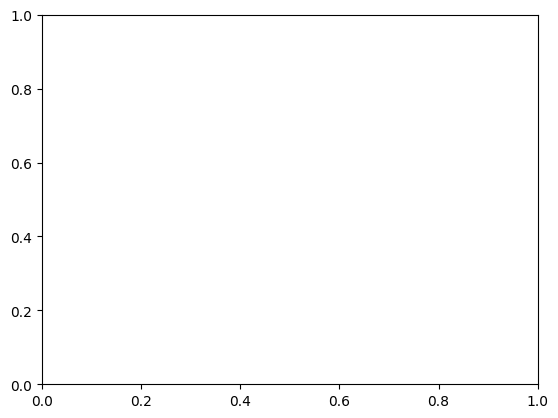

In [63]:
plot_gaze_new(gaze, stimulus_object=stimulus, plots_dir=plot_dir)

### Write separate CSVs for each page

Unnest [x, y] pixel column into separate pixel_x and piyel_y columns. This is necessary because polars does not support nested values when exporting CSV.

In [ ]:
df = df.select(
    [
        pl.all().exclude("pixel"),
        pl.col("pixel").list.get(0).alias("pixel_x"),
        pl.col("pixel").list.get(1).alias("pixel_y"),
    ]
)
df

Split data into CSV files.

In [ ]:
raw_dir = output_dir / "raw"
raw_dir.mkdir(exist_ok=True, parents=True)

for stimulus_id in df["stimulus_id"].unique():
    if stimulus_id is not None:
        stimulus_df = df.filter((pl.col("stimulus_id") == stimulus_id))
        stimulus_df = stimulus_df.select([
            pl.col("time"),
            pl.col("screen"),
            pl.col("pixel_x"),
            pl.col("pixel_y"),
            pl.col("pupil"),
        ])
        stimulus_df.write_csv(raw_dir / f"S007_{stimulus_id}.csv")

## ⬇️ Everything from this point on would be part of the published preprocessing pipeline ⬇️

## Dataset definition

In [ ]:
from dataclasses import dataclass, field
import pymovements as pm


@dataclass
class Multipleye(pm.DatasetDefinition):
    name: str = "Multipleye"

    filename_format: str = r"S{subject_id:d}_{stimulus_id}.csv"

    filename_format_dtypes = {
        "subject_id": int,
        "stimulus_id": str,
        "screen": str,
    }

    trial_columns: list[str] = field(default_factory=lambda: ["subject_id", "stimulus_id", "screen"])

    time_column: str = "time"

    time_unit: str = "ms"

    pixel_columns: list[str] = field(default_factory=lambda: ["pixel_x", "pixel_y"])


# TODO: Read this from a metadata file
experiment = pm.Experiment(
    sampling_rate=2000,
    screen_width_px=1275,
    screen_height_px=916,
    screen_width_cm=37,
    screen_height_cm=28,
    distance_cm=60,
)

dataset = pm.Dataset(Multipleye(experiment=experiment), "output")
dataset.load()
dataset.gaze = dataset.gaze[:1]  # To avoid OOM
dataset.gaze

## Fixation and saccade detection

Notes:
- `compute_event_properties()` uses a lot of memory (https://github.com/aeye-lab/pymovements/issues/753). It's currently not possible to run it on the entire dataset on any ol' laptop.

In [ ]:
# Savitzky-Golay filter as in https://doi.org/10.3758/BRM.42.1.188
window_length = round(experiment.sampling_rate / 1000 * 50)  # 50 ms
if window_length % 2 == 0:  # Must be odd
    window_length += 1
dataset.pix2deg().pos2vel(method="savitzky_golay", window_length=window_length, degree=2)
dataset.detect("ivt")
dataset.compute_event_properties(("location", dict(position_column="pixel")))
# dataset.detect("fill", name="saccade")
# dataset.detect("microsaccades")
dataset.events

## Plots

### Gaze plot

In [ ]:
import math

import matplotlib.pyplot as plt
import PIL.Image
import polars as pl
from matplotlib.patches import Circle

trial = 0
screen = "page_2"

gaze_df = dataset.gaze[trial].frame.select(
    pl.col("screen"),
    pl.col("pixel").list.get(0).alias("pixel_x"),
    pl.col("pixel").list.get(1).alias("pixel_y"),
).filter(pl.col("screen") == screen)

event_df = (
    dataset.events[trial]
    .frame.filter(pl.col("name") == "fixation")
    .select(
        pl.col("screen"),
        pl.col("duration"),
        pl.col("location").list.get(0).alias("pixel_x"),
        pl.col("location").list.get(1).alias("pixel_y"),
    )
    .filter(pl.col("screen") == screen)
)

fig, ax = plt.subplots()
stimulus_image = PIL.Image.open(
    f"../data/stimuli_MultiplEYE_HR_CH_Zurich_1_2025/stimuli_images_hr_ch_1/enc_wikimoon_id13_{screen}_hr.png"
)
ax.imshow(stimulus_image)
plt.plot(gaze_df["pixel_x"], gaze_df["pixel_y"], color="black", linewidth=0.5, alpha=0.3)
for row in event_df.iter_rows(named=True):
    fixation = Circle(
        (row["pixel_x"], row["pixel_y"]),
        math.sqrt(row["duration"]),
        color="blue",
        fill=True,
        alpha=0.5,
        zorder=10,
    )
    ax.add_patch(fixation)
ax.set_xlim((0, experiment.screen.width_px))
ax.set_ylim((experiment.screen.height_px, 0))